In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.signal as signal

In [2]:
def extract_weightmap(im):
    "selects the non white part of the image"
    ww = np.zeros(shape=im.shape[:2])
    ww[np.where(im.sum(axis=2) < 4.)] = 1.
    return ww

def invert_weightmap(ww):
    return 1 - ww

# Loading maps

In [3]:
map_oceans = plt.imread("../maps/LOTR_MAPS_oceans.png")
map_rivers = plt.imread("../maps/LOTR_MAPS_rivers.png")
map_hills = plt.imread("../maps/LOTR_MAPS_hills.png")
map_mountains = plt.imread("../maps/LOTR_MAPS_mountains.png")
map_ridges = plt.imread("../maps/LOTR_MAPS_ridges.png")

In [4]:
wmap_oceans = extract_weightmap(map_oceans)
wmap_rivers = extract_weightmap(map_rivers)
wmap_hills = extract_weightmap(map_hills)
wmap_mountains = extract_weightmap(map_mountains)
wmap_ridges = extract_weightmap(map_ridges)

In [5]:
wmap_land = invert_weightmap(wmap_oceans)

In [15]:
raw_elevation = np.load("lotr_map_raw_elevation.npz")["arr_0"]

In [33]:
np.unique(wmap_rivers)

array([0., 1.])

In [64]:
invert_weightmap(wmap_rivers)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [88]:
np.unique(wmap_rivers, return_counts=True)



(array([0., 1.]), array([7535084,  144916]))

In [82]:
arr.sum()

144916.0

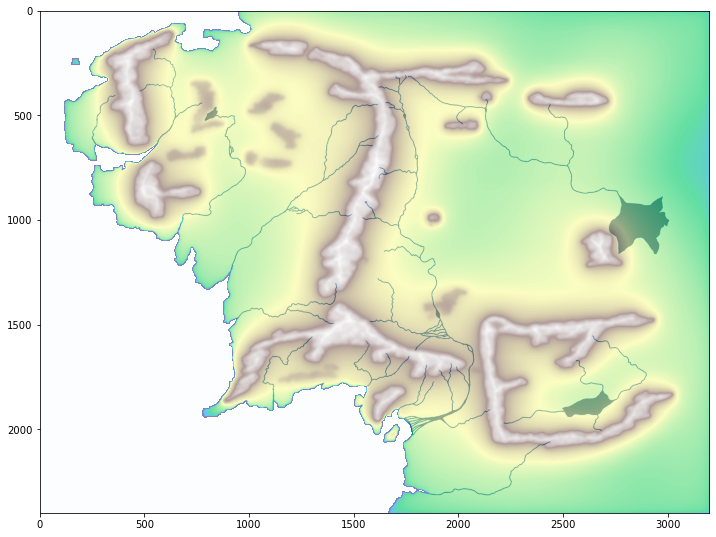

In [91]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(raw_elevation -0.00001, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())

ax.imshow(arr, cmap=plt.cm.Blues, alpha=0.4)

# Rivers must flow downhill

First establish rainfall patterns from river density

Smooth the terrain around rivers, rivers are in a local gradient valley at all times

Rhun and Nurn are inland seas, they are assumed to evaporate naturally, once water gets there